___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Linear Regression with SciKit-Learn

We saw how to create a very simple best fit line, but now let's greatly expand our toolkit to start thinking about the considerations of overfitting, underfitting, model evaluation, as well as multiple features!

## Imports

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sample Data

This sample data is from ISLR. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [189]:
df = pd.read_csv("Advertising.csv")

In [190]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Expanding the Questions

Previously, we explored **Is there a relationship between *total* advertising spend and *sales*?** as well as predicting the total sales for some value of total spend. Now we want to expand this to **What is the relationship between each advertising channel (TV,Radio,Newspaper) and sales?**

### Multiple Features (N-Dimensional)

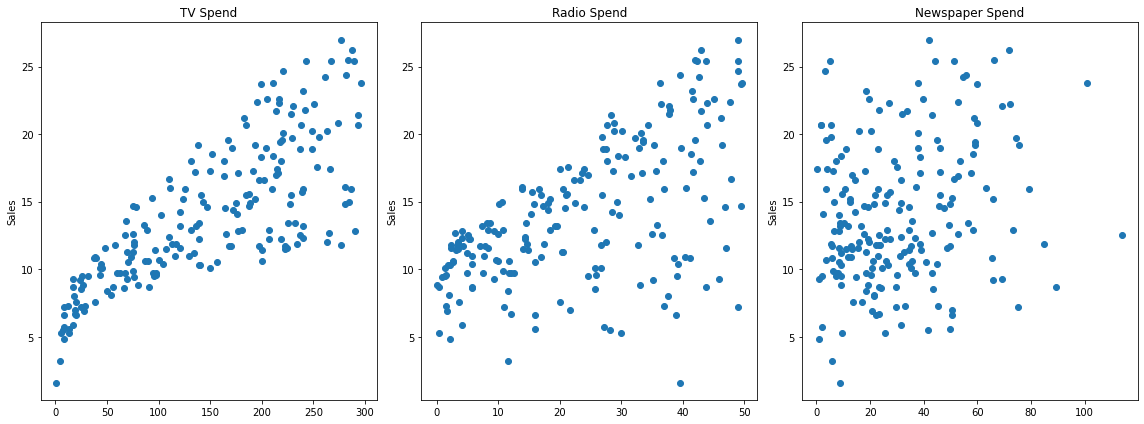

In [191]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

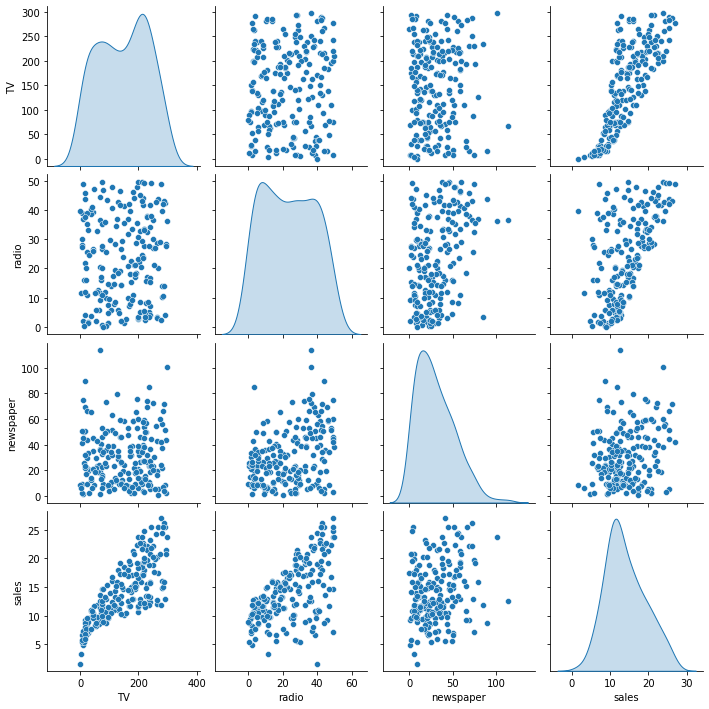

In [192]:
# Relationships between features
sns.pairplot(df,diag_kind='kde')

## Introducing SciKit Learn

We will work a lot with the scitkit learn library, so get comfortable with its model estimator syntax, as well as exploring its incredibly useful documentation!

---

In [193]:
X = df.drop('sales',axis=1)
y = df['sales']

## Train | Test Split

Make sure you have watched the Machine Learning Overview videos on Supervised Learning to understand why we do this step

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
# random_state: 
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [196]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [197]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [198]:
X_test

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2
119,19.4,16.0,22.3
54,262.7,28.8,15.9
74,213.4,24.6,13.1
145,140.3,1.9,9.0
142,220.5,33.2,37.9


In [199]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

## Creating a Model (Estimator)

#### Import a model class from a model family

In [200]:
from sklearn.linear_model import LinearRegression

#### Create an instance of the model with parameters

In [201]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean 

In [204]:
model = LinearRegression()

### Fit/Train the Model on the training data

**Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future data**

In [205]:
model.fit(X_train,y_train)

LinearRegression()

# Understanding and utilizing the Model

-----

## Evaluation on the Test Set

### Metrics

Make sure you've viewed the video on these metrics!
The three most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

### Calculate Performance on Test Set

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).

In [206]:
# X_test

In [207]:
# We only pass in test features
# The model predicts its own y hat
# We can then compare these results to the true y test label value
test_predictions = model.predict(X_test)

In [208]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [209]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [210]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [211]:
MAE

1.213745773614481

In [212]:
MSE

2.2987166978863796

In [213]:
RMSE

1.5161519375993884

In [214]:
df['sales'].mean()

14.0225

**Review our video to understand whether these values are "good enough".**

## Residuals

Revisiting Anscombe's Quartet: https://en.wikipedia.org/wiki/Anscombe%27s_quartet

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/850px-Anscombe%27s_quartet_3.svg.png">

<table class="wikitable">
<tbody><tr>
<th>Property
</th>
<th>Value
</th>
<th>Accuracy
</th></tr>
<tr>
<td><a href="/wiki/Mean" title="Mean">Mean</a> of <i>x</i>
</td>
<td>9
</td>
<td>exact
</td></tr>
<tr>
<td>Sample <a href="/wiki/Variance" title="Variance">variance</a> of <i>x</i>  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \sigma ^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>&#x03C3;<!-- σ --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \sigma ^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/53a5c55e536acf250c1d3e0f754be5692b843ef5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.385ex; height:2.676ex;" alt="\sigma ^{2}"/></span>
</td>
<td>11
</td>
<td>exact
</td></tr>
<tr>
<td>Mean of <i>y</i>
</td>
<td>7.50
</td>
<td>to 2 decimal places
</td></tr>
<tr>
<td>Sample variance of <i>y</i>  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \sigma ^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>&#x03C3;<!-- σ --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \sigma ^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/53a5c55e536acf250c1d3e0f754be5692b843ef5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.385ex; height:2.676ex;" alt="\sigma ^{2}"/></span>
</td>
<td>4.125
</td>
<td>±0.003
</td></tr>
<tr>
<td><a href="/wiki/Correlation" class="mw-redirect" title="Correlation">Correlation</a> between <i>x</i> and <i>y</i>
</td>
<td>0.816
</td>
<td>to 3 decimal places
</td></tr>
<tr>
<td><a href="/wiki/Linear_regression" title="Linear regression">Linear regression</a> line
</td>
<td><i>y</i>&#160;=&#160;3.00&#160;+&#160;0.500<i>x</i>
</td>
<td>to 2 and 3 decimal places, respectively
</td></tr>
<tr>
<td><a href="/wiki/Coefficient_of_determination" title="Coefficient of determination">Coefficient of determination</a> of the linear regression  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle R^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>R</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle R^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5ce07e278be3e058a6303de8359f8b4a4288264a" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.818ex; height:2.676ex;" alt="R^{2}"/></span>
</td>
<td>0.67
</td>
<td>to 2 decimal places
</td></tr></tbody></table>

In [215]:
quartet = pd.read_csv('anscombes_quartet1.csv')

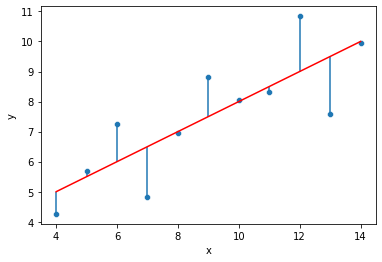

In [216]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

<AxesSubplot:xlabel='residual', ylabel='Density'>

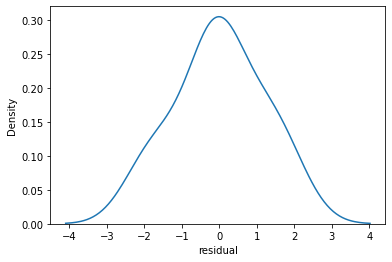

In [217]:
sns.kdeplot(quartet['residual'])

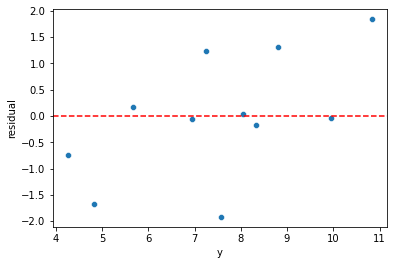

In [218]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

---

In [219]:
quartet = pd.read_csv('anscombes_quartet2.csv')

In [220]:
quartet.columns = ['x','y']

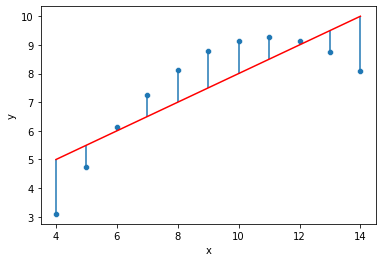

In [221]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

<AxesSubplot:xlabel='residual', ylabel='Density'>

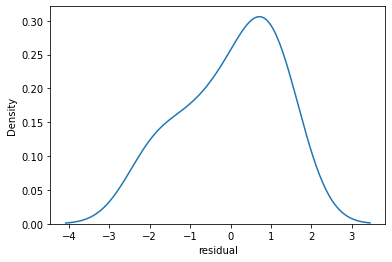

In [222]:
sns.kdeplot(quartet['residual'])

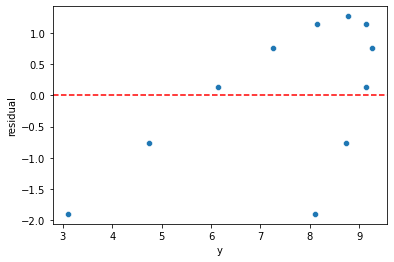

In [223]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

In [224]:
quartet = pd.read_csv('anscombes_quartet4.csv')

In [225]:
quartet

,x,y
0,8.0,6.58
1,8.0,5.76
2,8.0,7.71
3,8.0,8.84
4,8.0,8.47
5,8.0,7.04
6,8.0,5.25
7,19.0,12.50
8,8.0,5.56
9,8.0,7.91


In [226]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']

In [227]:
quartet['residual'] = quartet['y'] - quartet['pred_y']

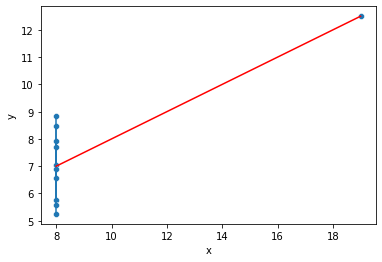

In [228]:
sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

<AxesSubplot:xlabel='residual', ylabel='Density'>

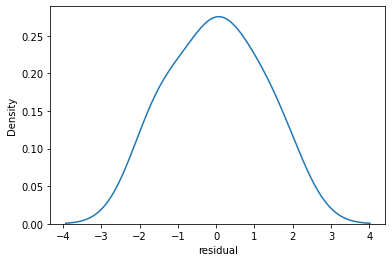

In [229]:
sns.kdeplot(quartet['residual'])

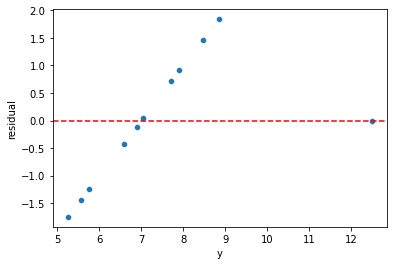

In [230]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

### Plotting Residuals

It's also important to plot out residuals and check for normal distribution, this helps us understand if Linear Regression was a valid model choice.

In [231]:
# Predictions on training and testing sets
# Doing residuals separately will alert us to any issue with the split call
test_predictions = model.predict(X_test)

In [232]:
# If our model was perfect, these would all be zeros
test_res = y_test - test_predictions

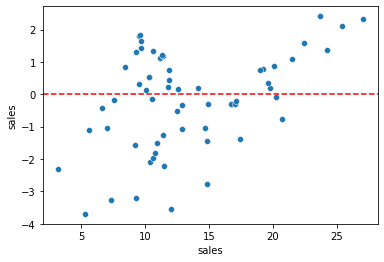

In [233]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [234]:
len(test_res)

60

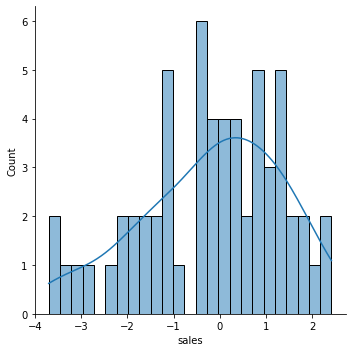

In [235]:
sns.displot(test_res,bins=25,kde=True)

Still unsure if normality is a reasonable approximation? We can check against the [normal probability plot.](https://en.wikipedia.org/wiki/Normal_probability_plot)

In [236]:
import scipy as sp

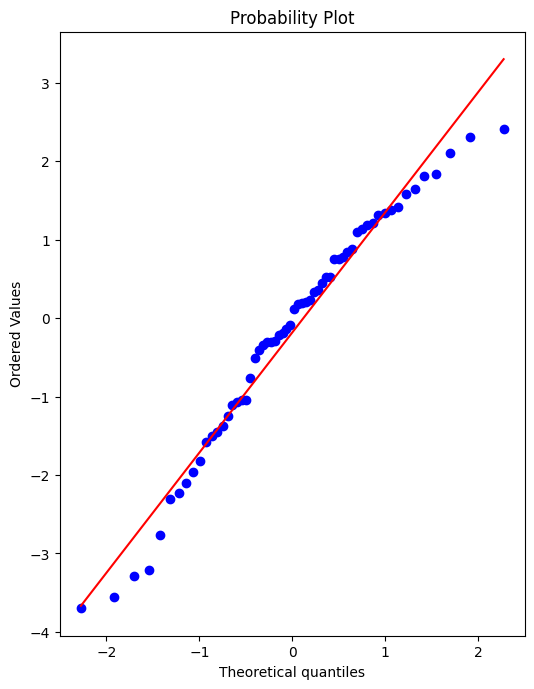

In [237]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

-----------

## Retraining Model on Full Data

If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data. (If we were not satisfied, we could update parameters or choose another model, something we'll discuss later on).

In [241]:
final_model = LinearRegression()

In [242]:
final_model.fit(X,y)

LinearRegression()

Note how it may not really make sense to recalulate RMSE metrics here, since the model has already seen all the data, its not a fair judgement of performance to calculate RMSE on data its already seen, thus the purpose of the previous examination of test performance.

## Deployment, Predictions, and Model Attributes

### Final Model Fit

Note, we can only do this since we only have 3 features, for any more it becomes unreasonable.

In [243]:
y_hat = final_model.predict(X)

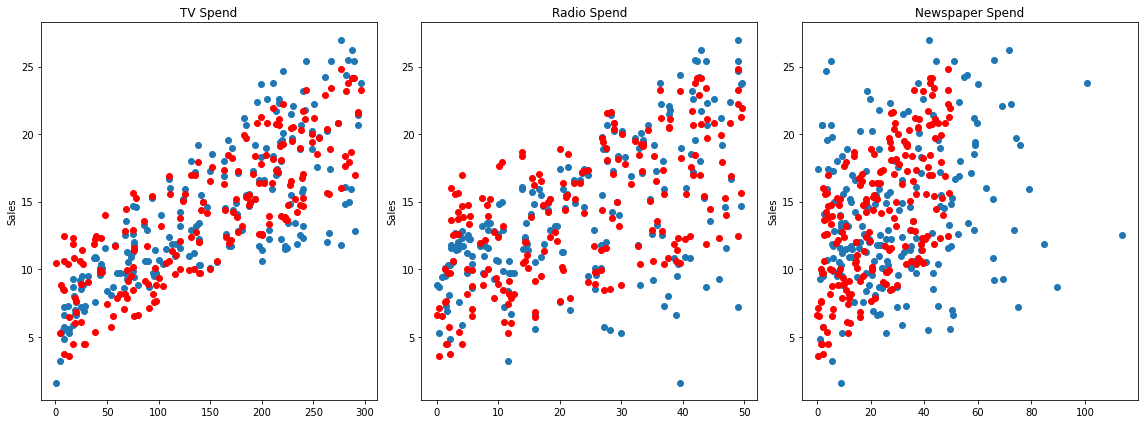

In [244]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

### Residuals

Should be normally distributed as discussed in the video.

In [247]:
residuals = y_hat - y

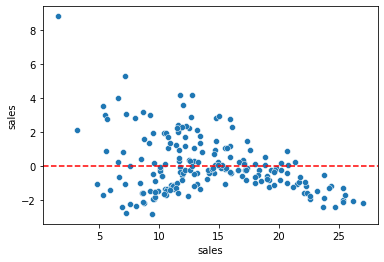

In [248]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

### Coefficients

In [249]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [250]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


Interpreting the coefficients:

---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in TV Spend is associated with an increase in sales of  0.045 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.
----

---
---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Radio Spend is associated with an increase in sales of  0.188 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Radio Ads, we could expect 188 more units sold.
----
----

* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Newspaper Spend is associated with a **decrease** in sales of  0.001 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Newspaper Ads, we could actually expect to sell 1 less unit. Being so close to 0, this heavily implies that newspaper spend has no real effect on sales.
---
---

**Note! In this case all our units were the same for each feature (1 unit = $1000 of ad spend). But in other datasets, units may not be the same, such as a housing dataset could try to predict a sale price with both a feature for number of bedrooms and a feature of total area like square footage. In this case it would make more sense to *normalize* the data, in order to clearly compare features and results. We will cover normalization later on.**

In [251]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Prediction on New Data

Recall , X_test data set looks *exactly* the same as brand new data, so we simply need to call .predict() just as before to predict sales for a new advertising campaign.

**Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [252]:
campaign = [[149,22,12]]

In [253]:
final_model.predict(campaign)

array([13.893032])

**How accurate is this prediction? No real way to know! We only know truly know our model's performance on the test data, that is why we had to be satisfied by it first, before training our full model**

-----

## Model Persistence (Saving and Loading a Model)

In [254]:
from joblib import dump, load

In [255]:
dump(final_model, 'sales_model.joblib') 

['sales_model.joblib']

In [256]:
loaded_model = load('sales_model.joblib')

In [257]:
loaded_model.predict(campaign)

array([13.893032])

## Up next...
### Is this the best possible performance? Its a simple model still, let's expand on the linear regresion model by taking a further look a regularization!

-------
--------